In [267]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150.0

In [268]:
import numpy as np
import matplotlib.pyplot as pl

In [269]:
from peerless._search import search
from peerless.data import load_light_curves_for_kic, running_median_trend

In [320]:
kicid = 8410697
lcs = load_light_curves_for_kic(kicid)

In [321]:
time = np.concatenate([lc.time for lc in lcs])
flux = np.concatenate([lc.flux for lc in lcs])
ferr = np.concatenate([lc.ferr for lc in lcs])
chunk = np.concatenate([i + np.zeros(len(lc), dtype=int) for i, lc in enumerate(lcs)])

# Sort the times.
inds = np.argsort(time)
time = np.ascontiguousarray(time[inds])
flux = np.ascontiguousarray(flux[inds])
ferr = np.ascontiguousarray(ferr[inds])
chunk = np.ascontiguousarray(chunk[inds])

In [322]:
flux_ivar = 1.0/ferr**2
tau = 0.6
# time_grid = np.ascontiguousarray(time[::2])
time_grid = np.arange(time.min(), time.max(), 0.25 * tau)

In [323]:
depth, depth_ivar = search(tau, time_grid, time, flux - 1.0, flux_ivar)
s2n = depth * np.sqrt(depth_ivar)

m = depth_ivar > 0.0
noise = np.nan + np.zeros_like(s2n)
noise[m] = running_median_trend(time_grid[m], np.abs(s2n[m]), 10.0)

In [324]:
m = s2n > 20 * noise
s2n_thresh = s2n[m]
t0_thresh = time_grid[m]
peaks = []

while len(s2n_thresh):
    i = np.argmax(s2n_thresh)
    t0 = t0_thresh[i]
    peaks.append((t0, s2n_thresh[i]))
    m = np.abs(t0_thresh - t0) > 2*tau
    s2n_thresh = s2n_thresh[m]
    t0_thresh = t0_thresh[m]

In [325]:
peaks

[(1589.6396380801441, 188.02020434681924),
 (541.88963808010442, 180.54578314416648)]

In [316]:
t0 = time_grid[np.argsort(s2n)[-1]] + 0.5*tau

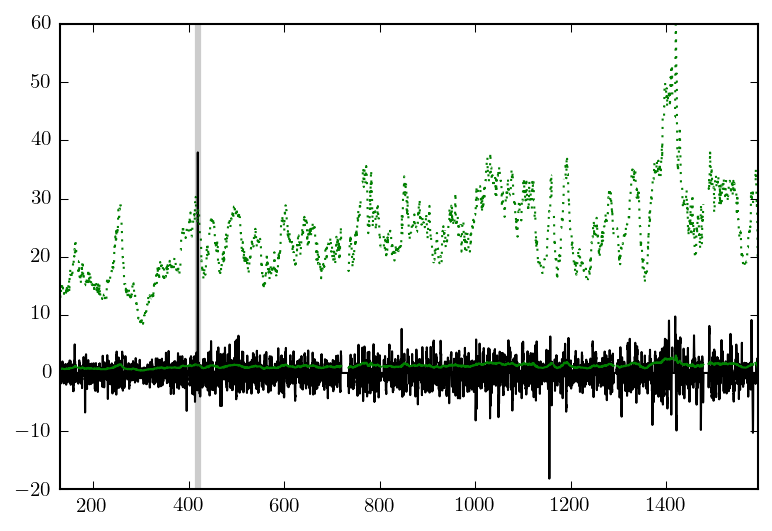

In [317]:
pl.plot(time_grid, s2n, "k")
pl.plot(time_grid, noise, "g")
pl.plot(time_grid, 20*noise, ":g")
pl.gca().axvline(t0, color="k", lw=3, alpha=0.2)
pl.xlim(time.min(), time.max());

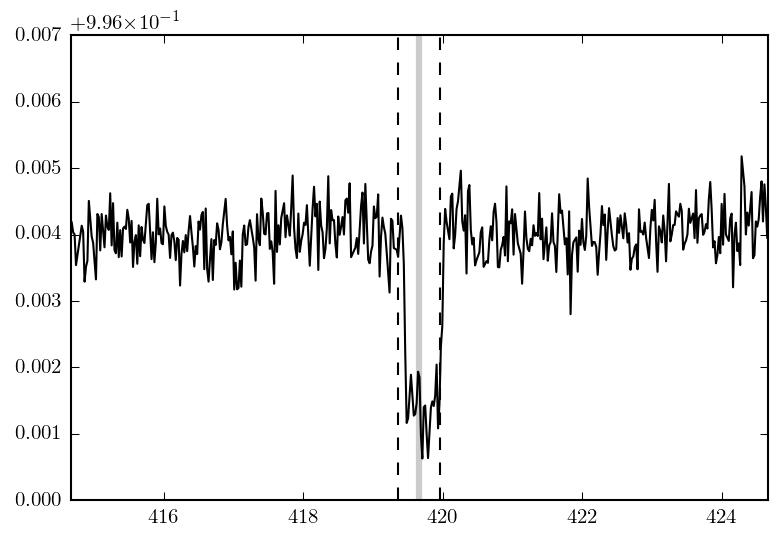

In [318]:
[pl.plot(lc.time, lc.flux, "-k") for lc in lcs]
pl.gca().axvline(t0, color="k", lw=3, alpha=0.2)
pl.gca().axvline(t0 - 0.5*tau, color="k", ls="dashed")
pl.gca().axvline(t0 + 0.5*tau, color="k", ls="dashed")
pl.xlim(t0 - 5, t0 + 5);

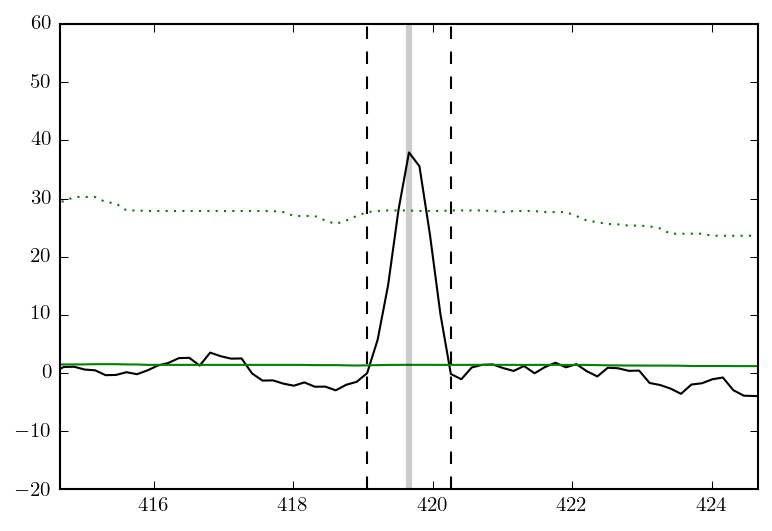

In [319]:
pl.plot(time_grid+0.5*tau, s2n, "k")
pl.plot(time_grid+0.5*tau, noise, "g")
pl.plot(time_grid, 20*noise, ":g")
pl.gca().axvline(t0, color="k", lw=3, alpha=0.2)
pl.gca().axvline(t0 - tau, color="k", ls="dashed")
pl.gca().axvline(t0 + tau, color="k", ls="dashed")
pl.xlim(t0 - 5, t0 + 5);